## CODE HERE IS TO CALCUALTE THE TRIMMED MEAN USING INTERPOLATION

In [1]:
"""
CODE HERE IS TO CALCUALTE THE TRIMMED MEAN USING INTERPOLATION
"""
from typing import List, Tuple, Union
import numpy as np


def trim_list(list_given: List[int], decimal_percent: float) -> List[int]:
    """
    Given a list, make a copy of it and sort it in ascending order
    trim amount = Multiply the decimal percent by the length of the given list and round it
    Based on the trim amount, trim the copy of the list where 2 * trim amount = total items trimmed

    :param list_given: list to get trimmed
    :param decimal_percent: percentage to trim the given list by
    :return: trimmed copy of the list
    """
    list_temp = list_given.copy()
    list_temp.sort()
    amount_to_trim = round(decimal_percent * len(list_temp))

    while amount_to_trim != 0:
        list_temp.pop(0)
        list_temp.pop(-1)
        amount_to_trim -= 1

    return list_temp


def calculate_all_perfect_trimmed_means_and_percentages(list_given: List[int]) -> Tuple[List[float], List[float]]:
    """
    Given a list:
        Calculate number of trims
        Calculate all perfect trims

        Loop through all perfect trims:
            Calculate trimmed mean
            Add trimmed mean to list of trimmed means

    :param list_given: list of values
    :return: list_mean_trimmed_perfect, list_trim_percentage_perfect
    """
    # Sort the given list if not sorted
    list_given.sort()

    # List of trimmed means that can perfectly trim the given list
    list_mean_trimmed_perfect = []

    # Length of list
    length_list = len(list_given)

    # TODO: CAN BE OPTIMIZED BY GETTING HALF THE AMOUNT OF TRIMS HERE
    # Number of trims that will be made to the list
    number_of_trims = length_list if length_list % 2 else length_list - 1

    # List of what you can trim the given list by
    list_trim_numbers = list(map(lambda x: x + 1, range(number_of_trims)))

    # Calculate the percentages that can split the given list perfectly upto 50%
    list_trim_percentage_perfect = (
        [x for i in list_trim_numbers if (x := float(i / length_list)) <= .5])

    # Loop through each percentage (perfect trim percentage)
    for i in range(len(list_trim_percentage_perfect)):

        # Result of a trimmed list by given percentage
        list_trimmed_temp = trim_list(
            list_given, list_trim_percentage_perfect[i])

        # If trimmed list if empty, ignore it
        if not list_trimmed_temp:
            continue

        # Trimmed mean
        mean_trimmed = np.mean(list_trimmed_temp) * .01

        # Add trimmed mean to list of trimmed means that can perfectly trim the given list
        list_mean_trimmed_perfect.append(mean_trimmed)

    return list_mean_trimmed_perfect, list_trim_percentage_perfect


def trimmed_mean_interpolation(list_given: List[int], decimal_percent: float) -> Union[np.float64, float]:
    """
    Calculates the trimmed mean regardless of whether or not the given decimal percent can trim the the given list
    perfectly.

    If the decimal percent is not perfect then:
        Calculate left and right interpolated bounds
        Calculate the alpha
        Calculate the trimmed mean via interpolated bounds method

    Notes:
        Recall equation (interpolating weights) for finding alpha where the decimal percent is not perfect
            PERCENT = alpha(LEFT_BOUND_PERCENT) + (1 - alpha)(RIGHT_BOUND_PERCENT)
            Solve for alpha


        Recall equation for trimmed mean where decimal percent is not perfect
            TRIMMED_MEAN =  alpha(LEFT_BOUND_TRIMMED_MEAN_PERFECT) + (1 - alpha)(RIGHT_BOUND_TRIMMED_MEAN_PERFECT)
            Solve for TRIMMED_MEAN

    :param list_given: list of numbers
    :param decimal_percent: percentage to trim the list by
    :return: trimmed mean
    """

    # Calculate all perfect trims and their corresponding percentages
    list_mean_trimmed_perfect, list_trim_percentage_perfect = calculate_all_perfect_trimmed_means_and_percentages(
        list_given)

    # print(list_mean_trimmed_perfect)
    # print(list_trim_percentage_perfect)

    # If the given decimal trim is a perfect trim
    if decimal_percent in list_mean_trimmed_perfect:
        return np.mean(trim_list(list_given, decimal_percent))

    # Index Bounds where the given decimal percent is in between
    index_left_bound, index_right_bound = _find_interpolated_weights(decimal_percent,
                                                                     list_trim_percentage_perfect)

    # Numerator for solving alpha
    numerator = (decimal_percent -
                 list_trim_percentage_perfect[index_right_bound])

    # Denominator for solving alpha
    denominator = ((list_trim_percentage_perfect[index_left_bound]) -
                   (list_trim_percentage_perfect[index_right_bound]))

    # Alpha (Floating point error here)
    alpha = (numerator / denominator)
    # print(alpha)

    # Left and Right bound interpolation for solving the trimmed mean (Floating point errors here too)
    left_bound_interpolation = (
        alpha * list_mean_trimmed_perfect[index_left_bound])
    right_bound_interpolation = ((1 - alpha) *
                                 list_mean_trimmed_perfect[index_right_bound])

    # Calculate trimmed mean via interpolated method
    # Multiply by 100 to convert it out of percentage
    trimmed_mean = (left_bound_interpolation + right_bound_interpolation) * 100

    return trimmed_mean


def _find_interpolated_weights(value: float, list_in_between_sorted: List[float]) -> Tuple[int, int]:
    """
    Finds where the given value is in between the given list that is ASSUMED to be sorted
    Returns the indices where the value is in between in the given list

    WARNING:
        Dangerous, it assumes index + 1 exists

    :param value: value that should be in between list_in_between_sorted
    :param list_in_between_sorted: given list
    :return:
    """
    # Indices
    index_left_bound = None
    index_right_bound = None

    # Current index
    index = 0

    try:
        # Loop to check where the given value is in between
        while True:
            if value >= list_in_between_sorted[index]:
                index_left_bound = index

            if value <= list_in_between_sorted[index + 1]:
                index_right_bound = index + 1

            # If the bounds are found return it
            if index_left_bound is not None and index_right_bound is not None:
                return index_left_bound, index_right_bound

            index += 1
    except IndexError as e:
        print(e)
        print("Index is out of bounds. Is the given value in between a pair of the values in the given list?")

In [2]:
import rpy2
%load_ext rpy2.ipython

C:\Users\Joseph\anaconda3\lib\site-packages\rpy2\robjects\packages.py:365: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


# 1. DEVORESTAT9 1.E.033.S.
The May 1, 2009, issue of a certain publication reported the following home sale amounts for a sample of homes in Alameda, CA that were sold the previous month (1,000s of $).

<img src="images/1_3_and_1_4_problem_1.png" alt="1_3_and_1_4_problem_1.png" style="float:left;">
<table class="noborders"> <tbody><tr> <td> <font color="red">586</font> </td> <td> <font color="red">814</font> </td> <td> <font color="red">572</font> </td> <td> <font color="red">610</font> </td> <td> <font color="red">348</font> </td> <td> <font color="red">1,280</font> </td> <td> <font color="red">412</font> </td> <td> <font color="red">541</font> </td> <td> <font color="red">555</font> </td> <td> <font color="red">681</font> </td> </tr> </tbody></table>

In [3]:
p1_string_data = "586	814	572	610	348	1,280	412	541	555	681"

p1_list_data = p1_string_data.split(sep="\t")

p1_list_data = [int(i.replace(",", "")) for i in p1_list_data]

p1_list_data.sort()

print(p1_list_data)

[348, 412, 541, 555, 572, 586, 610, 681, 814, 1280]


### (a) Calculate and interpret the sample mean and median.
<img src="images/1_3_and_1_4_problem_1a_solution.png" alt="1_3_and_1_4_problem_1a_solution.png" style="float:left;">

In [4]:
import numpy as np

p1a_mean = np.mean(p1_list_data)
p1a_median = np.median(p1_list_data)

print(f"{p1a_mean=}")
print(f"{p1a_median=}")

p1a_mean=639.9
p1a_median=579.0


In [5]:
%%R -i p1_list_data

# R solution
p1_list_data <- as.numeric(p1_list_data)

print(mean(p1_list_data))
print(median(p1_list_data))

[1] 639.9
[1] 579


<h3> (b) Suppose the 6th observation had been 985 rather than <span class="nobr"><font color="red">1,280</font>.</span> How would the mean and median change? </h3>
<img src="images/1_3_and_1_4_problem_1b_solution.png" alt="1_3_and_1_4_problem_1b_solution.png" style="float:left;">

In [6]:
# Replace if 1280 then replace it with 985
p2_list_data = [(i if i != 1280 else 985) for i in p1_list_data]

# Replace if 1280 then replace it with 985 v2
p2_list_data = [(985 if i == 1280 else i) for i in p1_list_data]

print(p2_list_data)
print()

p1b_mean = np.mean(p2_list_data)  # why use np.mean, because of c speed!
p1b_median = np.median(p2_list_data)

print(f"{p1b_mean=}")
print(f"{p1b_median=}")

[348, 412, 541, 555, 572, 586, 610, 681, 814, 985]

p1b_mean=610.4
p1b_median=579.0


In [7]:
%%R -i p2_list_data

# R solution
p2_list_data <- as.numeric(p2_list_data)

print(mean(p2_list_data))
print(median(p2_list_data))

[1] 610.4
[1] 579


### (c) Calculate a 20% trimmed mean by first trimming the two smallest and two largest observations. (Round your answer to the nearest hundred dollars.)

In [8]:
# Trim the list
p1c_list_new = trim_list(p1_list_data, .20)

print("Trimmed list: {}".format(p1c_list_new))
print()

# Multiple by 1000 because it's not in 1,000s of $
print("{:.0f}".format(np.mean(p1c_list_new) * 1000))

Trimmed list: [541, 555, 572, 586, 610, 681]

590833


In [9]:
%%R -i p1_list_data

# R solution
p1_list_data <- as.numeric(p1_list_data)

print(mean(p1_list_data, trim=0.2))

# Multiple by 1000 because it's not in 1,000s of $
print(round(mean(p1_list_data, trim=0.2) * 1000))

[1] 590.8333
[1] 590833


### (d) Calculate a 15% trimmed mean. (Round your answer to the nearest hundred dollars.)


In [10]:
p1_trimmed_mean_via_interpolation = trimmed_mean_interpolation(p1_list_data, .15)
print(p1_list_data)
print()

# Multiple by 1000 because it's not in 1, 000s of $
print("{:.0f}".format(p1_trimmed_mean_via_interpolation * 1000))

[348, 412, 541, 555, 572, 586, 610, 681, 814, 1280]

593604


In [11]:
%%R
# R SOLUTION NOT POSSIBLE UNLESS YOU CODE IT WHICH IS GOING TO BE DIFFICULT BECAUSE 15% DOES NOT PROPERLY CUT THE LIST

NULL


# 2. DEVORESTAT9 1.E.035.MI.S.
Mercury is a persistent and dispersive environmental contaminant found in many ecosystems around the world. When released as an industrial by-product, it often finds its way into aquatic systems where it can have deleterious effects on various avian and aquatic species. The accompanying data on blood mercury concentration (<span style="font-family: 'Trebuchet MS', 'Lucida Grande', sans-serif; font-size: 1.10em">µ</span>g/g) for adult females near contaminated rivers in a state was read from a graph in an article.

<img src="images/1_3_and_1_4_problem_2.png" alt="1_3_and_1_4_problem_2.png" style="float:left;">

<table class="wa1basicc"> <tbody><tr> <td> <font color="red">0.20</font> </td> <td> <font color="red">0.21</font> </td> <td> <font color="red">0.26</font> </td> <td> <font color="red">0.30</font> </td> <td> <font color="red">0.35</font> </td> <td> <font color="red">0.41</font> </td> <td> <font color="red">0.54</font> </td> <td> <font color="red">0.57</font> </td> </tr> <tr> <td> <font color="red">1.43</font> </td> <td> <font color="red">1.70</font> </td> <td> <font color="red">1.82</font> </td> <td> <font color="red">2.20</font> </td> <td> <font color="red">2.24</font> </td> <td> <font color="red">3.06</font> </td> <td> <font color="red">3.26</font> </td> </tr> </tbody></table>

In [12]:
import re
string_data_2 = """
0.20	0.21	0.26	0.30	0.35	0.41	0.54	0.57
1.43	1.70	1.82	2.20	2.24	3.06	3.26"""

p2_list_data = re.split("\t|\n", string_data_2)
p2_list_data = [i for i in p2_list_data if i != ""]
p2_list_data = list(map(float, p2_list_data))

print(p2_list_data)

[0.2, 0.21, 0.26, 0.3, 0.35, 0.41, 0.54, 0.57, 1.43, 1.7, 1.82, 2.2, 2.24, 3.06, 3.26]


(<Figure size 540x126 with 1 Axes>, <matplotlib.axes._axes.Axes object at 0x00000208E223BA00>)


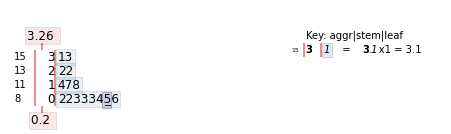

In [13]:
import stemgraphic

# Positive Skew
print(stemgraphic.stem_graphic(p2_list_data, scale=1))

### (a) Determine the values of the sample mean and sample median. Hint: xi = 18.55. (Round your answers to four decimal places.)
<img src="images/1_3_and_1_4_problem_2a_solution.png" alt="1_3_and_1_4_problem_2a_solution.png" style="float:left;">


In [14]:
mean = np.mean(p2_list_data)
median = np.median(p2_list_data)

print("mean: {:.4f}".format(mean))
print("median: {}".format(median))

mean: 1.2367
median: 0.57


In [15]:
%%R -i p2_list_data

# R Solution
p2_list_data <- as.numeric(p2_list_data)

print(mean(p2_list_data))
print(median(p2_list_data))

[1] 1.236667
[1] 0.57


### (b) Determine the value of the 10% trimmed mean. (Round your answer to four decimal places.)


In [16]:
print("(b) Determine the value of the 10% trimmed mean. (Round your answer to four decimal places.)")

p2_trimmed_mean_via_interpolation = trimmed_mean_interpolation(p2_list_data, .10)

print("Trimmed mean: {:.4f}".format(p2_trimmed_mean_via_interpolation))

(b) Determine the value of the 10% trimmed mean. (Round your answer to four decimal places.)
Trimmed mean: 1.1177


#### function: calculate_how_much_item_value_changes_without_affecting_sample_median

In [17]:
"""
calculate_how_much_item_value_changes_without_affecting_sample_median
"""

def calculate_how_much_item_value_changes_without_affecting_sample_median(value_observed: float, list_given: list, add_amount: float):
    list_given_copy = list_given.copy()
    index = list_given.index(value_observed)
    current_median = np.median(list_given)

    while True:
        list_given_copy[index] += add_amount

        new_median = np.median(list_given_copy)
        if current_median != new_median:
            print(f"Median Current: {current_median}")
            print(f"Median New: {new_median}")
            return list_given_copy[index] - list_given[index]

<h3> (c) By how much could the observation <font color="red">0.20</font> be increased without impacting the value of the sample median? </h3>

In [18]:
print("Increase:", "{:.4f}".format(calculate_how_much_item_value_changes_without_affecting_sample_median(.2, p2_list_data, .01)))

Median Current: 0.57
Median New: 0.5700000000000003
Increase: 0.3700


In [19]:
"""
Alternatively, you can look where the middle is in the p2_list_data then see how much does 0.20 need to be > .57

idk why it differs
"""
print(np.median(p2_list_data) - p2_list_data[1])

0.36


# 3. DEVORESTAT9 1.E.039.S.
The propagation of fatigue cracks in various aircraft parts has been the subject of extensive study in recent years. The accompanying data consists of propagation lives (flight hours/10<sup>4</sup>) to reach a given crack size in fastener holes intended for use in military aircraft.
<img src="images/1_3_and_1_4_problem_3.png" alt="1_3_and_1_4_problem_3.png" style="float:left;">
<table cellspacing="3" cellpadding="3"> <tbody><tr style="text-align:right"> <td> <font color="red">0.738</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">0.852</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">0.870</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">0.909</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">0.923</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">0.938</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">0.968</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">1.009</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> </tr> <tr style="text-align:right"> <td> <font color="red">1.039</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">1.052</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">1.083</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">1.119</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">1.135</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">1.162</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">1.227</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> <td> <font color="red">1.357</font> <span style="white-space: nowrap">&nbsp;&nbsp;</span> </td> </tr> </tbody></table>

In [20]:
p3_string_data = """
0.738   	0.852   	0.870   	0.909   	0.923   	0.938   	0.968   	1.009   
1.039   	1.052   	1.083   	1.119   	1.135   	1.162   	1.227   	1.357 
"""
p3_list_data = re.split("\t|\n", p3_string_data)
p3_list_data = [i for i in p3_list_data if i != ""]
p3_list_data = list(map(float, p3_list_data))
print(p3_list_data)

[0.738, 0.852, 0.87, 0.909, 0.923, 0.938, 0.968, 1.009, 1.039, 1.052, 1.083, 1.119, 1.135, 1.162, 1.227, 1.357]


### (a) Compute and compare the values of the sample mean x bar and median x tilde. (Round your mean to four decimal places.)

In [21]:
# print("(a) Compute and compare the values of the sample mean x and median x tilde. (Round your mean to four decimal places.)")

print("Mean: {:.4f} flight hours/10^4".format(np.mean(p3_list_data)))
print("Median: {:.4f} flight hours/10^4".format(np.median(p3_list_data)))

Mean: 1.0238 flight hours/10^4
Median: 1.0240 flight hours/10^4


In [22]:
%%R -i p3_list_data

# R Solution
p3_list_data <- as.numeric(p3_list_data)

print(mean(p3_list_data))
print(median(p3_list_data))

[1] 1.023813
[1] 1.024


### (b) By how much could the largest sample observation be decreased without affecting the value of the median? (Enter your answer to three decimal places.)


In [23]:
print("Increase: {:.3f}".format(
    calculate_how_much_item_value_changes_without_affecting_sample_median(1.357, p3_list_data, -.0001)))
print()

print("Decrease: {:.3f}".format(abs(calculate_how_much_item_value_changes_without_affecting_sample_median(1.357, p3_list_data, -.0001))))

Median Current: 1.024
Median New: 1.0239500000000175
Increase: -0.318

Median Current: 1.024
Median New: 1.0239500000000175
Decrease: 0.318


# 4. DEVORESTAT9 1.E.047.S.
Zinfandel is a popular red wine varietal produced almost exclusively in California. It is rather controversial among wine connoisseurs because its alcohol content varies quite substantially from one producer to another. In May 2013, the author went to a certain website, randomly selected 10 zinfandels from among the 325 available, and obtained the following values of alcohol content (%).

<img src="images/1_3_and_1_4_problem_4.png" alt="1_3_and_1_4_problem_4.png" style="float:left;">
<table class="noborders"> <tbody><tr> <td> <font color="red">14.8</font> </td> <td> <font color="red">14.6</font> </td> <td> <font color="red">16.1</font> </td> <td> <font color="red">14.3</font> </td> <td> <font color="red">16.0</font> </td> </tr> <tr> <td> <font color="red">13.8</font> </td> <td> <font color="red">16.2</font> </td> <td> <font color="red">14.7</font> </td> <td> <font color="red">13.9</font> </td> <td> <font color="red">15.1</font> </td> </tr> </tbody></table>

In [24]:
string_data_4 = """

14.8	14.6	16.1	14.3	16.0
13.8	16.2	14.7	13.9	15.1

"""
p4_list_data = re.split("\t|\n", string_data_4)
p4_list_data = [i for i in p4_list_data if i != ""]
p4_list_data = list(map(float, p4_list_data))
p4_list_data.sort()

print(p4_list_data)

[13.8, 13.9, 14.3, 14.6, 14.7, 14.8, 15.1, 16.0, 16.1, 16.2]


### (a) Calculate and interpret several measures of center
<img src="images/1_3_and_1_4_problem_4a_solution.png" alt="1_3_and_1_4_problem_4a_solution.png" style="float:left;">


In [25]:
print("Mean: {:.4f}".format(np.mean(p4_list_data)))
print("Median: {:.4f}".format(np.median(p4_list_data)))

Mean: 14.9500
Median: 14.7500


In [26]:
%%R -i p4_list_data

# R Solution
p4_list_data <- as.numeric(p4_list_data)

print(mean(p4_list_data))
print(median(p4_list_data))

[1] 14.95
[1] 14.75


### (b) Calculate the sample variance using the defining formula. (Round your answer to three decimal places.)

In [27]:
# ddof=1 for sample variance
print("Sample Variance: {:.3f}".format(np.var(p4_list_data, ddof=1)))

Sample Variance: 0.785


In [28]:
%%R -i p4_list_data

# R Solution
p4_list_data <- as.numeric(p4_list_data)

print(var(p4_list_data))

[1] 0.785


### (c) Calculate the sample variance using the shortcut formula after subtracting 13 from each observation. (Round your answer to three decimal places.)

In [29]:
p4_list_data_v2 = list(map(lambda x: x - 13, p4_list_data))
print("Values of (p4_list_data_v2 - 13)")
print(p4_list_data_v2)
print()

# ddof= 1 for sample variance
print("Sample Variance: {:.3f}".format(np.var(p4_list_data_v2, ddof=1)))

Values of (p4_list_data_v2 - 13)
[0.8000000000000007, 0.9000000000000004, 1.3000000000000007, 1.5999999999999996, 1.6999999999999993, 1.8000000000000007, 2.0999999999999996, 3.0, 3.1000000000000014, 3.1999999999999993]

Sample Variance: 0.785


In [30]:
%%R -i p4_list_data_v2

# R Solution
p4_list_data_v2 <- as.numeric(p4_list_data_v2)

print(var(p4_list_data_v2))

[1] 0.785


# 5. DEVORESTAT9 1.E.051.S.
An article reported the following data on oxidation-induction time (min) for various commercial oils:

<img src="images/1_3_and_1_4_problem_5.png" alt="1_3_and_1_4_problem_5.png" style="float:left;">
<table cellpadding="3"> <tbody><tr style="text-align:right"> <td> <font color="red">85</font> &nbsp; </td> <td> <font color="red">102</font> &nbsp; </td> <td> <font color="red">130</font> &nbsp; </td> <td> <font color="red">160</font> &nbsp; </td> <td> <font color="red">180</font> &nbsp; </td> <td> <font color="red">195</font> &nbsp; </td> <td> <font color="red">131</font> &nbsp; </td> <td> <font color="red">145</font> &nbsp; </td> <td> <font color="red">212</font> &nbsp; </td> <td> <font color="red">105</font> &nbsp; </td> <td> <font color="red">145</font> &nbsp; </td> </tr> <tr style="text-align:right"> <td> <font color="red">151</font> &nbsp; </td> <td> <font color="red">153</font> &nbsp; </td> <td> <font color="red">135</font> &nbsp; </td> <td> <font color="red">87</font> &nbsp; </td> <td> <font color="red">99</font> &nbsp; </td> <td> <font color="red">95</font> &nbsp; </td> <td> <font color="red">119</font> &nbsp; </td> <td> <font color="red">129</font> &nbsp; </td> </tr> </tbody></table>

In [31]:
string_data_5 = """

85  	102  	130  	160  	180  	195  	131  	145  	212  	105  	145  
151  	153  	135  	87  	99  	95  	119  	129  

"""
p5_list_data = re.split("\t|\n", string_data_5)
p5_list_data = [i for i in p5_list_data if i != ""]
p5_list_data = list(map(int, p5_list_data))
p5_list_data.sort()
print(p5_list_data)

[85, 87, 95, 99, 102, 105, 119, 129, 130, 131, 135, 145, 145, 151, 153, 160, 180, 195, 212]


### (a) Calculate the sample variance and standard deviation. (Round your answers to four decimal places.)

In [32]:
# ddof= 1 for sample variance
p5_sample_variance_list_data = np.var(p5_list_data, ddof=1)

print("Sample Variance (s^2): {:.4f}".format(p5_sample_variance_list_data))

# ddof= 1 for sample variance
print("Standard Deviation (s): {:.4f}".format(np.std(p5_list_data, ddof=1)))

print("Standard Deviation (s) V2: {:.4f}".format(
    np.sqrt(p5_sample_variance_list_data)))

Sample Variance (s^2): 1276.5789
Standard Deviation (s): 35.7292
Standard Deviation (s) V2: 35.7292


In [33]:
%%R -i p5_list_data

# R Solution
p5_list_data <- as.numeric(p5_list_data)

print(var(p5_list_data))
print(sd(p5_list_data))

[1] 1276.579
[1] 35.72924


In [34]:
"""
min_to_hour, the second equation is correct
"""

def min_to_hour(minutes):
    """Hour and Minutes"""
    hour = minutes // 60
    minutes_new = (minutes % 60) * .01
    return hour + minutes_new


def min_to_hour(minutes):
    """Hour and percentage of hour"""
    hour = minutes / 60
    return hour

In [35]:
p5_list_data_v2 = list(map(min_to_hour, p5_list_data))
print(p5_list_data_v2)

[1.4166666666666667, 1.45, 1.5833333333333333, 1.65, 1.7, 1.75, 1.9833333333333334, 2.15, 2.1666666666666665, 2.183333333333333, 2.25, 2.4166666666666665, 2.4166666666666665, 2.5166666666666666, 2.55, 2.6666666666666665, 3.0, 3.25, 3.533333333333333]


In [36]:
# ddof= 1 for sample variance
sample_variance_p5_list_data_v2 = np.var(p5_list_data_v2, ddof=1)
print("Sample Variance (s^2): {:.4f}".format(sample_variance_p5_list_data_v2))

# ddof= 1 for sample variance
print("Standard Deviation (s): {:.4f}".format(np.std(p5_list_data_v2, ddof=1)))
print("Standard Deviation (s) V2 : {:.4f}".format(
    np.sqrt(sample_variance_p5_list_data_v2)))

Sample Variance (s^2): 0.3546
Standard Deviation (s): 0.5955
Standard Deviation (s) V2 : 0.5955


In [37]:
%%R -i p5_list_data_v2

# R Solution
p5_list_data_v2 <- as.numeric(p5_list_data_v2)

print(var(p5_list_data_v2))
print(sd(p5_list_data_v2))

[1] 0.3546053
[1] 0.5954874


# 6. DEVORESTAT9 1.E.055.
A sample of 26 offshore oil workers took part in a simulated escape exercise, resulting in the accompanying data on time (sec) to complete the escape. Here is a stem-and-leaf display of escape time data.

<img src="images/1_3_and_1_4_problem_6.png" alt="1_3_and_1_4_problem_6.png" style="float:left;">
<table class="wa1stem tableans" summary="This is a stem and leaf table. There may be empty cells."> <tbody><tr> <th scope="col"> stem </th> <th scope="col"> leaf </th> </tr> <tr> <td> 32 </td> <td> <font color="red">55</font> </td> </tr> <tr> <td> 33 </td> <td> <font color="red">49</font> </td> </tr> <tr> <td> 34 </td> <td> </td> </tr> <tr> <td> 35 </td> <td> <font color="red">6699</font> </td> </tr> <tr> <td> 36 </td> <td> <font color="red">34469</font> </td> </tr> <tr> <td> 37 </td> <td> <font color="red">03345</font> </td> </tr> <tr> <td> 38 </td> <td> <font color="red">3</font> </td> </tr> <tr> <td> 39 </td> <td> <font color="red">2347</font> </td> </tr> <tr> <td> 40 </td> <td> <font color="red">23</font> </td> </tr> <tr> <td> 41 </td> <td> </td> </tr> <tr> <td> 42 </td> <td> <font color="red">5</font> </td> </tr> </tbody></table>

In [38]:
import io

string_data_6 = """
32	55
33	49
34	
35	6699
36	34469
37	03345
38	3
39	2347
40	23
41	
42	5
"""
p6_list_data = []

x = (io.StringIO(string_data_6))

current_str = " " # While string has something in it
while current_str:
    # Current line
    current_str = x.readline()
    
    # Base number before the \t
    base = current_str.split("\t")[0]
    
    # Left portion
    sub_numbers = re.search("\t[0-9]+", current_str)
    
    # Skip empties
    if sub_numbers is None:
        continue

    for i in sub_numbers.group(0):
        # If the next character is tab then stop
        if i == "\t":
            continue
        p6_list_data.append(int(base + i))

p6_list_data.sort()
print(p6_list_data)
print()

print("Length of list: {}".format(len(p6_list_data)))

[325, 325, 334, 339, 356, 356, 359, 359, 363, 364, 364, 366, 369, 370, 373, 373, 374, 375, 383, 392, 393, 394, 397, 402, 403, 425]

Length of list: 26


(<Figure size 540x252 with 1 Axes>, <matplotlib.axes._axes.Axes object at 0x00000208E23B8040>)


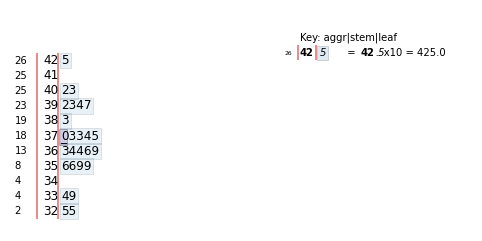

In [39]:
print(stemgraphic.stem_graphic(p6_list_data, scale=10, ))

#### function: find_fourth_spread 

In [40]:
"""
find_fourth_spread 
"""
def _first_value_greater_than_min(list_given: list, minimum: int) -> int:
    list_copy = list_given.copy()
    list_copy.sort()
    for i in list_copy:
        if i > minimum:
            return i


def _first_value_less_than_max(list_given: list, maximum: int) -> int:
    list_copy = list_given.copy()
    list_copy.sort()
    list_copy.reverse()
    for i in list_copy:
        if i < maximum:
            return i


def find_fourth_spread(list_given: list):
    list_given.sort()

    length_list = len(list_given)
    split_size = int(length_list / 2 if length_list % 2 == 0 else length_list // 2 + 1)

    # Middle line in Box in Box plot
    median = np.median(list_given)

    # Split lists
    lower_half = list_given[:split_size]
    upper_half = list_given[-split_size:]

    # Left part of Box in Box plot
    lower_fourth = np.median(lower_half)

    # Right part of Box in Box plot
    upper_fourth = np.median(upper_half)

    # Range of Box plot
    fourth_spread = upper_fourth - lower_fourth

    # Min and Max Limit before values become outliers
    outlier_lower = lower_fourth - 1.5 * fourth_spread
    outlier_upper = upper_fourth + 1.5 * fourth_spread

    # Minimum tail for Box Plot
    minimum_tail_before_outlier = _first_value_greater_than_min(list_given, outlier_lower)

    # Maximum tail for Box Plot
    maximum_tail_before_outlier = _first_value_less_than_max(list_given, outlier_upper)

    outlier_lower_ex = lower_fourth - 3 * fourth_spread
    outlier_upper_ex = upper_fourth + 3 * fourth_spread

    return fourth_spread, median, lower_fourth, upper_fourth, outlier_lower, outlier_upper, outlier_lower_ex, outlier_upper_ex, minimum_tail_before_outlier, maximum_tail_before_outlier


def print_fourth_spread(find_fourth_spread_output):
    print("fourth Spread: {}".format(find_fourth_spread_output[0]))
    print("Median: {}".format(find_fourth_spread_output[1]))
    print("Lower fourth: {}".format(find_fourth_spread_output[2]))
    print("Upper fourth: {}".format(find_fourth_spread_output[3]))
    print("Outlier Lower: {}".format(find_fourth_spread_output[4]))
    print("Outlier Upper: {}".format(find_fourth_spread_output[5]))
    print("Outlier Lower Extreme: {}".format(find_fourth_spread_output[6]))
    print("Outlier Upper Extreme: {}".format(find_fourth_spread_output[7]))
    print("Box plot Minimum Tail: {}".format(find_fourth_spread_output[8]))
    print("Box plot Maximum Tail: {}".format(find_fourth_spread_output[9]))


def fourth_spread_solver(list_given):
    fourth_spread_values = find_fourth_spread(list_given)
    print_fourth_spread(fourth_spread_values)
    return (fourth_spread_values)


### (a) Determine the value of the fourth spread.

In [41]:
print("(a) Determine the value of the fourth spread.")

p6a_fouth_spread_values = find_fourth_spread(p6_list_data)

print_fourth_spread(p6a_fouth_spread_values)

(a) Determine the value of the fourth spread.
fourth Spread: 33.0
Median: 369.5
Lower fourth: 359.0
Upper fourth: 392.0
Outlier Lower: 309.5
Outlier Upper: 441.5
Outlier Lower Extreme: 260.0
Outlier Upper Extreme: 491.0
Box plot Minimum Tail: 325
Box plot Maximum Tail: 425


### (b) Are there any outliers in the sample? Any extreme outliers?
<img src="images/1_3_and_1_4_problem_6b_solution.png" alt="1_3_and_1_4_problem_6b_solution.png" style="float:left;">

### (c) Construct a boxplot.

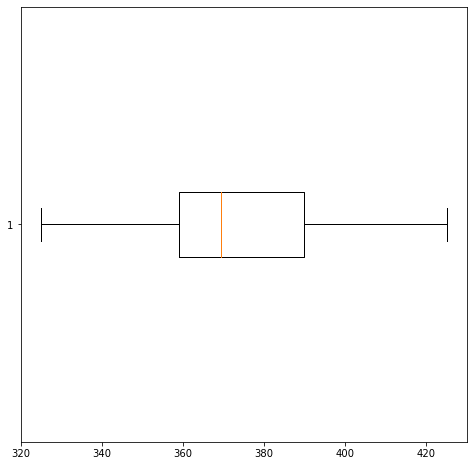

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.boxplot(p6_list_data, vert=False)  # Notice no outliers
print(end="")

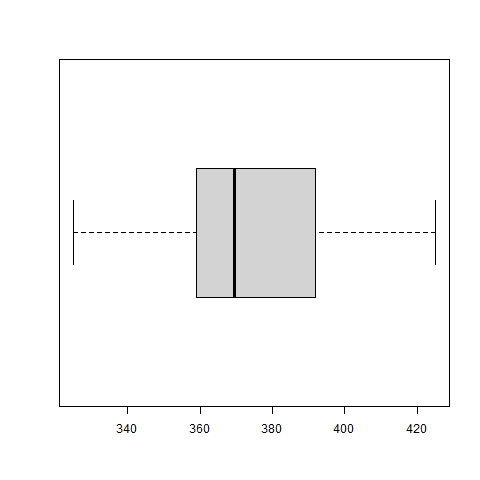

In [43]:
%%R -i p6_list_data

# R Solution
p6_list_data <- as.numeric(p6_list_data)

boxplot(p6_list_data, horizontal=TRUE)

<img src="images/1_3_and_1_4_problem_6c_solution.png" alt="1_3_and_1_4_problem_6c_solution.png" style="float:left;">

#### Comment on its features.
<img src="images/1_3_and_1_4_problem_6c_comment_solution.png" alt="1_3_and_1_4_problem_6c_comment_solution.png" style="float:left;">

#### function: calculate_how_much_value_be_changed_till_fourth_spread_change

In [44]:
def calculate_how_much_value_be_changed_till_fourth_spread_change(value_to_change, list_given, value_add):
    list_given_copy = list_given.copy()

    current_fourth_spread = find_fourth_spread(list_given)[0]
    index = list_given.index(value_to_change)

    new_fourth_spread = current_fourth_spread
    
    while current_fourth_spread == new_fourth_spread:
        list_given_copy[index] += value_add
        new_fourth_spread = find_fourth_spread(list_given_copy)[0]

    return list_given[index] - list_given_copy[index]

<h3>(d) By how much could the largest observation, currently <font color="red">425</font>, be decreased without affecting the value of the fourth spread?</h3>

In [45]:
calculate_how_much_value_be_changed_till_fourth_spread_change(
    425, p6_list_data, value_add=-1)

33

In [46]:
"""
Alternatively if you know what half 425 is in (upper_half) then you can just find the differnce between 425 and upper_fourth (a median)
So 425 - 392 = 33
"""
# Max value of p6_list_data - upper_fourth
print(p6_list_data[-1] - p6a_fouth_spread_values[3])

33.0


# 7. DEVORESTAT9 1.E.508.XP.
Consider the following observations on shear strength (MPa) of a joint bonded in a particular manner.

<img src="images/1_3_and_1_4_problem_7.png" alt="1_3_and_1_4_problem_7.png" style="float:left;">
<table cellspacing="3" cellpadding="3"> <tbody><tr style="text-align:right"> <td> &nbsp; <font color="red">22.0</font> &nbsp; </td> <td> &nbsp; <font color="red">40.4</font> &nbsp; </td> <td> &nbsp; <font color="red">16.4</font> &nbsp; </td> <td> &nbsp; <font color="red">73.4</font> &nbsp; </td> <td> &nbsp; <font color="red">36.6</font> &nbsp; </td> <td> &nbsp; <font color="red">108.6</font> &nbsp; </td> </tr> <tr style="text-align:right"> <td> &nbsp; <font color="red">30.0</font> &nbsp; </td> <td> &nbsp; <font color="red">4.4</font> &nbsp; </td> <td> &nbsp; <font color="red">33.1</font> &nbsp; </td> <td> &nbsp; <font color="red">66.7</font> &nbsp; </td> <td> &nbsp; <font color="red">81.5</font> &nbsp; </td> </tr> </tbody></table>

In [47]:
string_data_7 = """


  22.0  	  40.4  	  16.4  	  73.4  	  36.6  	  108.6  
  30.0  	  4.4  	  33.1  	  66.7  	  81.5  


"""
p7_list_data = re.split("\t|\n", string_data_7)
p7_list_data = [i for i in p7_list_data if i != ""]
p7_list_data = list(map(float, p7_list_data))
p7_list_data.sort()
print(p7_list_data)

[4.4, 16.4, 22.0, 30.0, 33.1, 36.6, 40.4, 66.7, 73.4, 81.5, 108.6]


### (a) What are the values of the fourths? (Enter your answers to two decimal places.) 
### (c) How large or small does an observation have to be to qualify as an outlier? (Round your answers to one decimal place.)

In [48]:
text = """
(a) What are the values of the fourths? (Enter your answers to two decimal places.)
(c) How large or small does an observation have to be to qualify as an outlier? (Round your answers to one decimal place.)
"""
# print(text)
p7a_fouth_spread_values = find_fourth_spread(p7_list_data)

print_fourth_spread(p7a_fouth_spread_values)

fourth Spread: 44.05000000000001
Median: 36.6
Lower fourth: 26.0
Upper fourth: 70.05000000000001
Outlier Lower: -40.07500000000002
Outlier Upper: 136.12500000000003
Outlier Lower Extreme: -106.15000000000003
Outlier Upper Extreme: 202.20000000000005
Box plot Minimum Tail: 4.4
Box plot Maximum Tail: 108.6


### (b) Construct a boxplot based on the five-number summary.


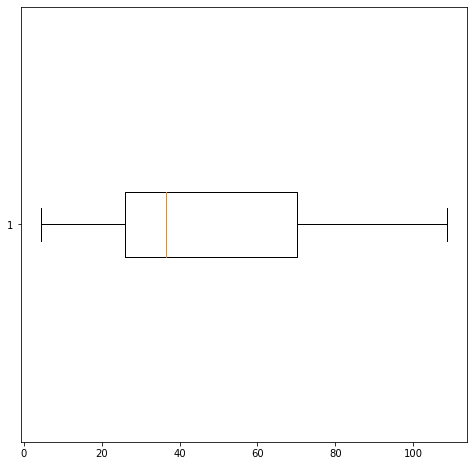

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.boxplot(p7_list_data, vert=False)
print(end="")

<img src="images/1_3_and_1_4_problem_7b_solution.png" alt="1_3_and_1_4_problem_7b_solution.png" style="float:left;">

#### Comment on its features. (Select all that apply.)
<img src="images/1_3_and_1_4_problem_7b_comment_solution.png" alt="1_3_and_1_4_problem_7b_comment_solution.png" style="float:left;">

In [50]:
print("Mean: {}".format(np.mean(p7_list_data)))
print("Median: {}".format(np.median(p7_list_data)))
print("Mean is ahead of Median so skew positive")

Mean: 46.64545454545455
Median: 36.6
Mean is ahead of Median so skew positive


In [51]:
%%R -i p7_list_data

# R Solution
p7_list_data <- as.numeric(p7_list_data)

print(mean(p7_list_data))
print(median(p7_list_data))

[1] 46.64545
[1] 36.6


<h3>
(d) By how much could the largest observation be decreased without affecting <i>f<sub>s</sub></i>?<br></h3>

In [52]:
how_much = calculate_how_much_value_be_changed_till_fourth_spread_change(
    108.6,
    p7_list_data,
    -.1)

print("{:.2f}".format(how_much))

35.20


In [53]:
"""
Alternatively if you know what half 108.6 is in (upper_half) then you can just find the differnce between 108.6 and upper_fourth (a median)
So 108.6 - 70.05 = 38.54999999999998

idk why this differs
"""
# Max value of p7_list_data - upper_fourth
print(p7_list_data[-1] - p7a_fouth_spread_values[3])

38.54999999999998
